# Ishaan Sachdeva
# 210968086
# Week-3

In [86]:
import pandas as pd

In [87]:
import matplotlib.pyplot as plt

In [88]:
import seaborn as sn

In [89]:
df= pd.read_csv('bollywood.csv')
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


Q1. How many records are present in the dataset?

In [90]:
df.shape[0]

149

Q2. How many movies got released in each genre? Sort number of releases in each genre in descending order.

In [91]:
df.Genre = df.Genre.str.strip()

In [92]:
val=df['Genre'].value_counts()
val

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

Q3.Which genre had highest number of releases?

In [93]:
val.loc[val==val.max()]

Comedy    36
Name: Genre, dtype: int64

Q4.How many movies in each genre got released in different release times like long weekend, festive season, etc. 

In [94]:
pd.crosstab(df['Genre'],df['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


Q5.Which month of the year, maximum number movie releases are seen? 

In [95]:
df["Release Date"]=pd.to_datetime(df["Release Date"])
df["Release Date"]

0     2014-04-18
1     2013-01-04
2     2014-07-18
3     2013-01-04
4     2014-07-04
         ...    
144   2015-02-27
145   2015-03-13
146   2015-03-20
147   2015-03-20
148   2014-05-23
Name: Release Date, Length: 149, dtype: datetime64[ns]

In [96]:
df["month"]=df["Release Date"].dt.month

In [97]:
mx= df["month"].value_counts()
mx


1     20
3     19
5     18
7     16
2     16
4     11
9     10
6     10
11    10
10     9
8      8
12     2
Name: month, dtype: int64

In [98]:
mx.loc[mx==mx.max()]

1    20
Name: month, dtype: int64

Q6.Which month of the year typically sees most releases of high budgeted movies, that is,movies with budget of 25 crore or more?

In [99]:
v=df[df["Budget"]>=25]["month"].value_counts()
v

2     9
1     8
3     7
8     7
11    6
7     6
9     5
6     5
4     4
10    4
5     3
12    2
Name: month, dtype: int64

In [100]:
v.loc[v==v.max()]

2    9
Name: month, dtype: int64

Q7.Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

In [101]:
df["ROI"]=(df["BoxOfficeCollection"]-df["Budget"])/df["Budget"]

In [102]:
df.sort_values(by='ROI').tail(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,month,ROI
115,116,2013-08-09,Chennai Express,FS,Comedy,75,395.0,1882346,7954,1593,8,4.266667
101,102,2013-07-12,Bhaag Milkha Bhaag,N,Drama,30,164.0,2635390,4622,456,7,4.466667
37,38,2014-07-11,Humpty Sharma Ki Dulhania,N,Romance,20,130.0,6604595,14535,2208,7,5.500000
128,129,2013-10-18,Shahid,FS,Drama,6,40.0,1148516,3155,396,10,5.666667
58,59,2014-09-05,Mary Kom,N,Drama,15,104.0,6086811,26560,1647,9,5.933333
87,88,2013-06-14,Fukrey,N,Comedy,5,36.2,227912,222,39,6,6.240000
135,136,2013-09-20,The Lunchbox,N,Drama,10,85.0,1064854,4054,285,9,7.500000
132,133,2013-09-13,Grand Masti,LW,Comedy,35,298.0,1795640,3015,721,9,7.514286
89,90,2014-12-19,PK,HS,Drama,85,735.0,13270623,43767,5693,12,7.647059
64,65,2013-04-26,Aashiqui 2,N,Romance,12,110.0,2926673,4944,628,4,8.166667


Q8.Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [103]:
roi_LW = df[df["ReleaseTime"]=="LW"]
roi_LW["ROI"].mean()

1.1272053098737973

In [104]:
roi_FS = df[df["ReleaseTime"]=="FS"]
roi_FS["ROI"].mean()

0.9738532013595953

In [105]:
roi_HS = df[df["ReleaseTime"]=="HS"]
roi_HS["ROI"].mean()

0.8508667840873724

In [106]:
roi_N = df[df["ReleaseTime"]=="N"]
roi_N["ROI"].mean()

0.6577216305350877

Q9.Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

In [107]:
corr = df["BoxOfficeCollection"].corr(df["YoutubeLikes"])
corr

0.6825165877731297

Yes there is a correlation and its positive.

Q10.Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare

<AxesSubplot:xlabel='Genre', ylabel='YoutubeLikes'>

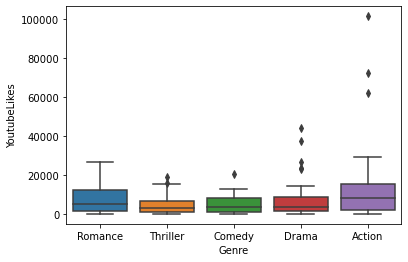

In [108]:
sn.boxplot(x="Genre",y="YoutubeLikes",data=df)

Q11.Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? 

In [115]:
df[["Budget","BoxOfficeCollection","YoutubeViews","YoutubeLikes","YoutubeDislikes"]].corr()

,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
Budget,1.000000,0.650401,0.589038,0.608916,0.665343
BoxOfficeCollection,0.650401,1.000000,0.588632,0.682517,0.623941
YoutubeViews,0.589038,0.588632,1.000000,0.884055,0.846739
YoutubeLikes,0.608916,0.682517,0.884055,1.000000,0.859730
YoutubeDislikes,0.665343,0.623941,0.846739,0.859730,1.000000


Q12.During 2013−2015 period, highlight the genre of movies and their box office collection?

In [110]:
gr = df[["Genre","BoxOfficeCollection"]]
gr

,Genre,BoxOfficeCollection
0,Romance,104.00
1,Thriller,12.00
2,Comedy,4.00
3,Drama,0.35
4,Comedy,10.80
...,...,...
144,Comedy,30.00
145,Thriller,32.10
146,Comedy,12.00
147,Comedy,11.89


In [112]:
df['year']=df['Release Date'].dt.year

<AxesSubplot:xlabel='Genre'>

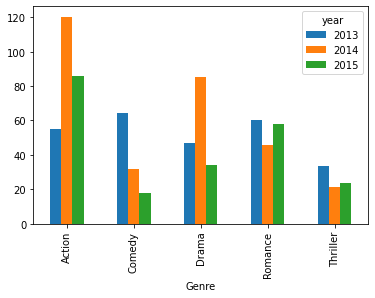

In [114]:
year = pd.pivot_table(data=df,index=['Genre'],columns=['year'],values='BoxOfficeCollection')
year.plot(kind='bar')

Q13.Visualize the Budget and Box office collection based on Genre.

<BarContainer object of 149 artists>

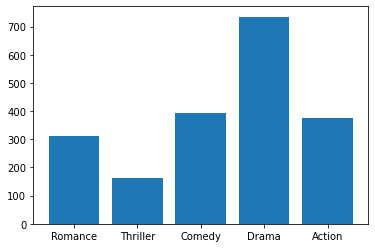

In [81]:
plt.bar(df["Genre"],df["BoxOfficeCollection"])

<BarContainer object of 149 artists>

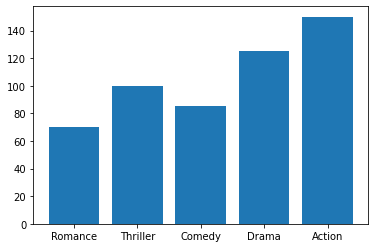

In [82]:
plt.bar(df["Genre"],df["Budget"])

Q14.Find the distribution of movie budget for every Genre.

In [118]:
pd.crosstab(df['Genre'],df['Budget'].sum())

col_0,4387
Genre,
Action,24
Comedy,36
Drama,35
Romance,25
Thriller,29


<AxesSubplot:xlabel='Genre', ylabel='Budget'>

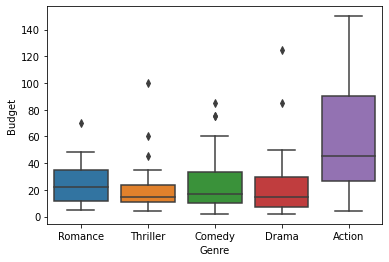

In [119]:
sn.boxplot(x='Genre',y='Budget',data=df)

Q15.During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph.

In [50]:
x=df["Release Date"].dt.year.value_counts()
x

2014    70
2013    67
2015    12
Name: Release Date, dtype: int64

<AxesSubplot:>

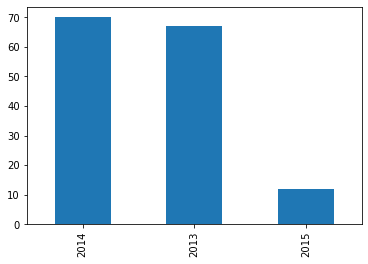

In [21]:
x.plot(kind="bar")